# **Customers Segmentation**

In this data analysis project, we will embark on a journey to explore and uncover patterns within a dataset of mall customers. Our focus will be on applying K-Means clustering, a popular unsupervised machine learning technique, to segment customers based on their spending behavior!

***Project Outline:***

---
1.   Exploratory Data Analysis (EDA):
Our journey begins with a thorough exploration of the dataset. We'll take a quick look at the first five rows using data.head() to understand the structure of the data. We'll also examine the dimensions of the dataset using data.shape, allowing us to understand the number of rows and columns. To ensure data quality, we'll utilize data.isnull().sum() to identify any missing values, if present.

2.   Data Visualization:
Visualizations provide valuable insights into the data. We'll create visual representations of key attributes such as age, annual income, and spending score distributions. By plotting histograms, box plots, and scatter plots, we aim to gain an understanding of the underlying patterns and relationships. We'll also explore distributions based on gender, providing us with insights into potential gender-based spending patterns.

3.   Model Building: Clustering using K-Means:
One of the main objectives of this project is to segment mall customers into distinct groups based on their spending behavior. We'll achieve this by employing the K-Means clustering algorithm. This technique groups similar data points together, creating clusters that enable us to understand customer segments with similar traits. We'll preprocess the data and determine the optimal number of clusters before applying the K-Means algorithm. Finally, we'll visualize the resulting clusters and delve into the characteristics that define each segment.  




# **Importing Essential Python Libraries for Data Analysis and Visualization :**

In [ ]:
# Import packages:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")

# **Exploratory Data Analysis (EDA) :**

In [ ]:
data = pd.read_csv("/content/Mall_Customers.csv")
data.head(5)

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.dtypes

In [ ]:
data.isnull().sum()

In [ ]:
# We're going to drop the "CustomerID" column from our dataset
data.drop("CustomerID", axis=1, inplace=True)

# **Data Visualization :**

In [ ]:
available_plt_styles = plt.style.available
available_plt_styles

In [ ]:
 plt.style.use('seaborn-v0_8-deep')

**Visualizing Data Distributions: Exploring Age, Annual Income and Spending Score :**

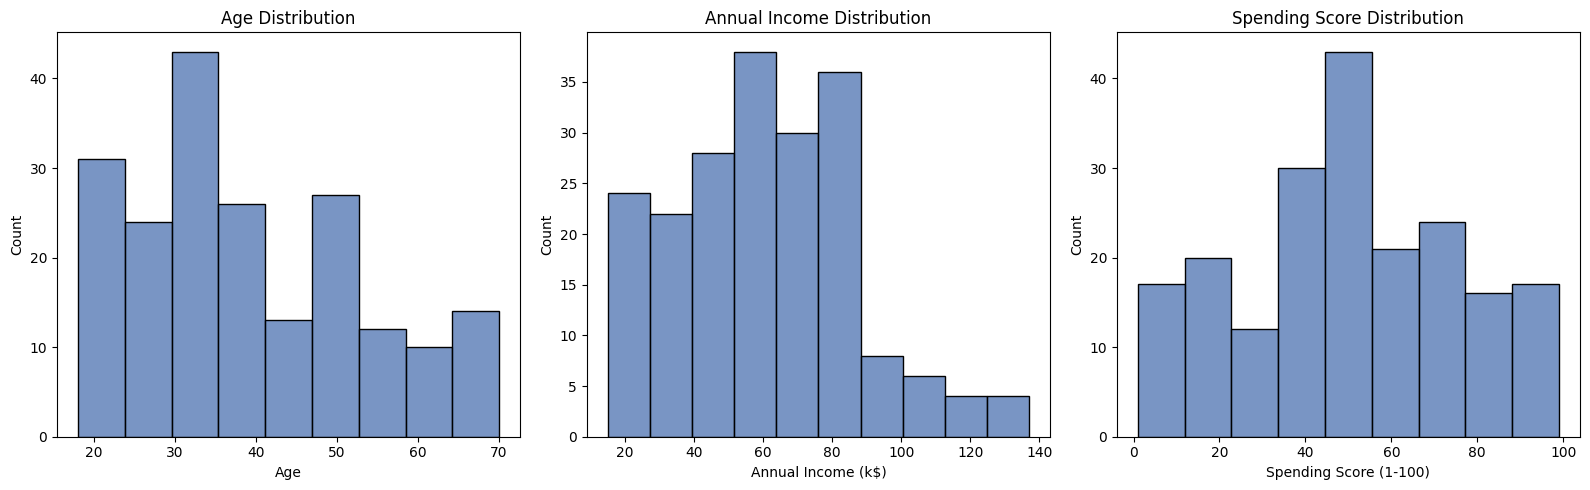

In [ ]:
plt.figure(figsize=(16, 5))

# Age
plt.subplot(1, 3, 1)
sns.histplot(data['Age'])
plt.title('Age Distribution')

# Annual Income (k$)
plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'])
plt.title('Annual Income Distribution')

# Spending Score (1-100)
plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'])
plt.title('Spending Score Distribution')

# layout optimization
plt.tight_layout()

plt.show()

**Distribution of genders :**

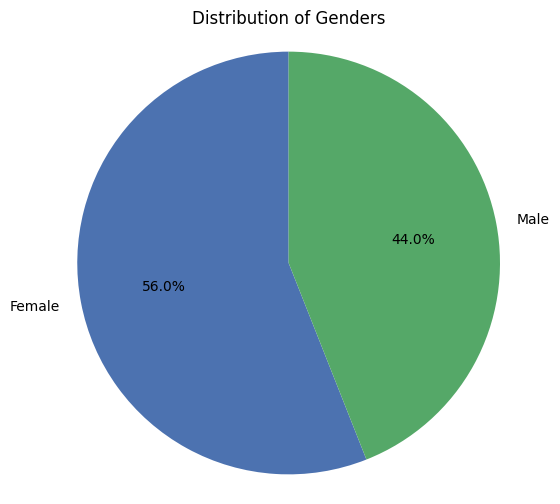

In [ ]:
# Prepare data
gender_counts = data['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Genders')
plt.axis('equal')
plt.show()

**Distribution of Annual Income by Gender :**

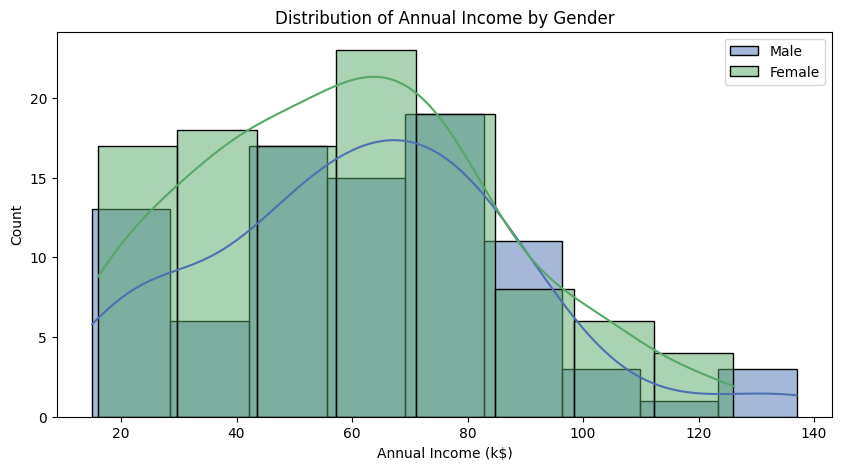

In [ ]:
# Calculate average annual income based on gender
gender_avg_income = data.groupby('Gender')['Annual Income (k$)'].mean()

# Set up the figure and subplots
fig, axes = plt.subplots(figsize=(10, 5))

# Distribution plot
sns.histplot(data[data['Gender'] == 'Male']['Annual Income (k$)'], label='Male', kde=True)
sns.histplot(data[data['Gender'] == 'Female']['Annual Income (k$)'], label='Female', kde=True)
plt.title('Distribution of Annual Income by Gender')
plt.legend()
plt.show()

**Distribution of Spending Score by Gender :**

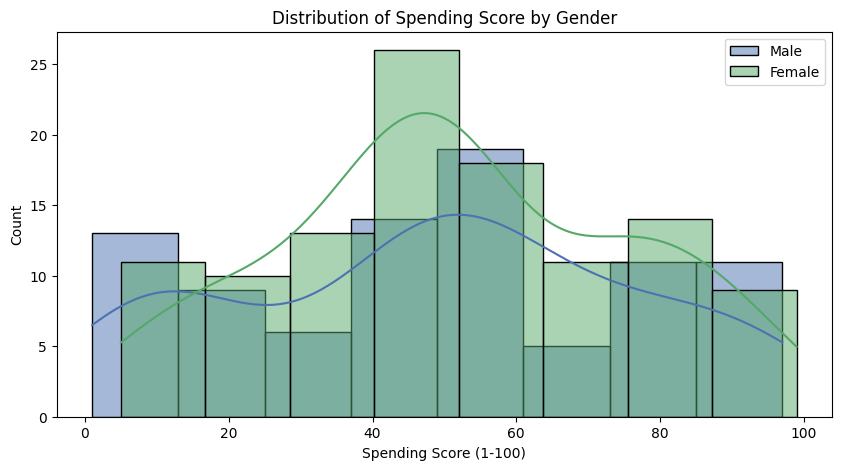

In [ ]:
# Calculate average spending score based on gender
gender_avg_spending = data.groupby('Gender')['Spending Score (1-100)'].mean()

# Set up the figure and subplots
fig, axes = plt.subplots(figsize=(10, 5))

# Distribution plot
sns.histplot(data[data['Gender'] == 'Male']['Spending Score (1-100)'], label='Male', kde=True)
sns.histplot(data[data['Gender'] == 'Female']['Spending Score (1-100)'], label='Female', kde=True)
plt.title('Distribution of Spending Score by Gender')
plt.legend()
plt.show()

# **Model Building: Clustering using K- means**

In [ ]:
# Extracting these specific columns: ('Annual Income (k$)', 'Spending Score (1-100)')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

In [ ]:
from sklearn.cluster import KMeans

# Initialize an empty list to store the inertia values
k = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    k.append(kmeans.inertia_)

In [ ]:
# Visualizing the ELBOW method to get the optimal value of K
plt.plot(range(1, 11), k)
plt.xlabel('Number of clusters (k)')
plt.ylabel('k')
plt.title('Elbow Method')
plt.show()

In [ ]:
# Model Build
model = KMeans(n_clusters=4, init='k-means++', random_state=0)
y_kmeans = model.fit_predict(X)

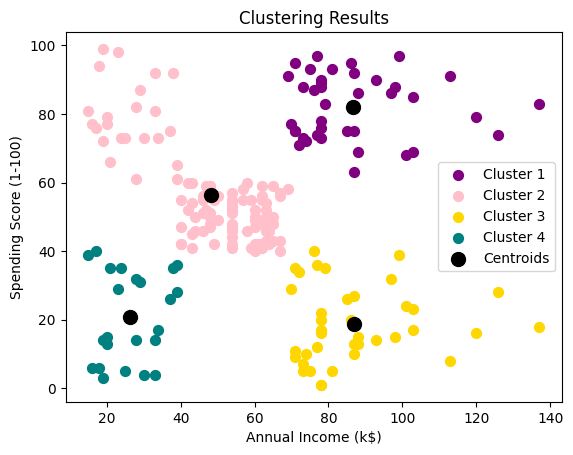

In [ ]:
# Visualize the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='purple', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='pink', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='gold', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c='teal', label='Cluster 4')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering Results')
plt.legend()
plt.show()